<a href="https://colab.research.google.com/github/SashankGhimire/AI_CW/blob/main/AI_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Load Dataset

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Dataset/UNSW_NB15_1.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/UNSW_NB15_2.csv")

#Merging Dataset
df = pd.concat([train_df, test_df], ignore_index=True)
print("Merged dataset shape:", df.shape)
df.head()

Merged dataset shape: (257673, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Separate Features and Target Label

In [ ]:
y = df['label']
X = df.drop(columns=['label', 'attack_cat'], errors='ignore')

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (257673, 43)
y shape: (257673,)


Check Class Imblance

In [ ]:
print(y.value_counts())
print(y.value_counts(normalize=True))


label
1    164673
0     93000
Name: count, dtype: int64
label
1    0.639077
0    0.360923
Name: proportion, dtype: float64


Handle Missing Values

In [ ]:
X = X.fillna(0)

Remove Non-Informative Features

In [ ]:
X = X.drop(columns=['srcip', 'dstip'], errors='ignore')
print("After removing IPs:", X.shape)


After removing IPs: (257673, 43)


Encode Categorical Features

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

X = pd.get_dummies(X, columns=categorical_cols)
print("After encoding:", X.shape)


Categorical columns: ['proto', 'service', 'state']
After encoding: (257673, 197)


Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (206138, 197)
Test shape: (51535, 197)


In [ ]:
dt = DecisionTreeClassifier(
    random_state=45,
    class_weight='balanced'
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=45)

In [ ]:
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9841078878432133

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18600
           1       0.99      0.99      0.99     32935

    accuracy                           0.98     51535
   macro avg       0.98      0.98      0.98     51535
weighted avg       0.98      0.98      0.98     51535



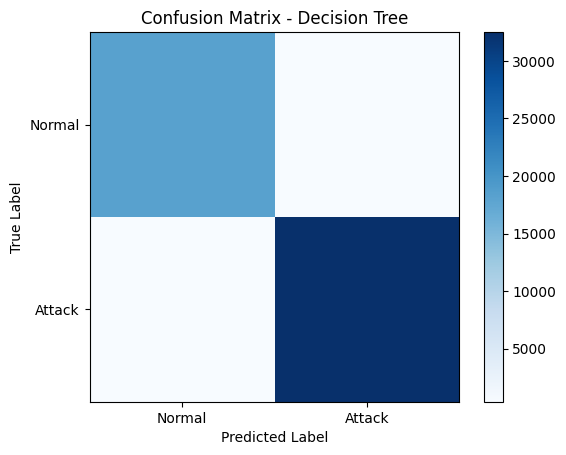

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm_dt, cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks([0, 1], ['Normal', 'Attack'])
plt.yticks([0, 1], ['Normal', 'Attack'])

plt.colorbar()
plt.show()

Random Forest

In [ ]:
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100
)

rf.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9765984282526439
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18600
           1       0.98      0.98      0.98     32935

    accuracy                           0.98     51535
   macro avg       0.97      0.97      0.97     51535
weighted avg       0.98      0.98      0.98     51535



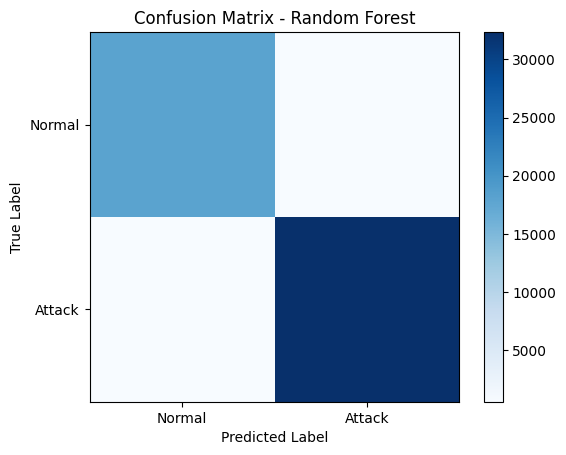

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure()
plt.imshow(cm_rf, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks([0, 1], ['Normal', 'Attack'])
plt.yticks([0, 1], ['Normal', 'Attack'])

plt.colorbar()
plt.show()


SVM Support Vector Machine

In [ ]:
svm = LinearSVC(
    class_weight='balanced',
    random_state=42,
    max_iter=5000
)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9076938003298729
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     18600
           1       0.94      0.91      0.93     32935

    accuracy                           0.91     51535
   macro avg       0.90      0.91      0.90     51535
weighted avg       0.91      0.91      0.91     51535



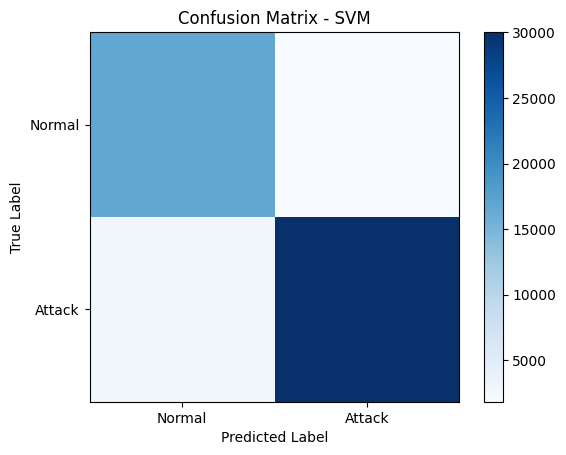

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure()
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks([0, 1], ['Normal', 'Attack'])
plt.yticks([0, 1], ['Normal', 'Attack'])

plt.colorbar()
plt.show()
